<a href="https://colab.research.google.com/github/ThomasTranGithub/6.6.23.Algo.Trading.Strategies/blob/main/Neural_Network_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**What is a Neural Network?**

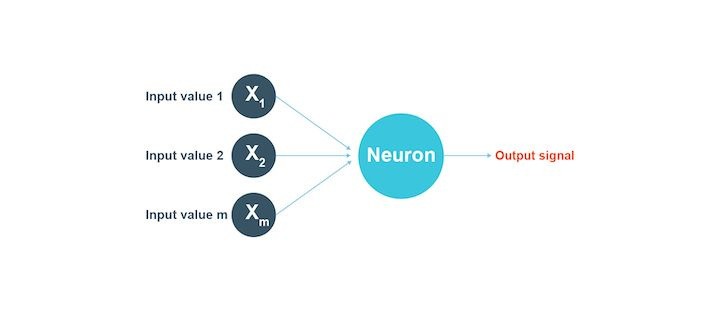

Neural networks take inputs and makes predictions similar to the human brain and biological neurons. The first layer absorbs the input, the hiden layers computes and weighs the inputs arriving at an output that can be translated into a signal.

* Perceptron
* Feed forward neural networks
* Multilayer perceptron
* Convolutional neural network
* Recurrent neural network
* Modular neural network

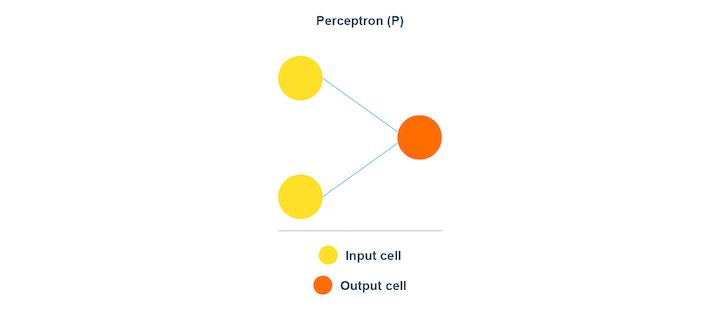

image.png

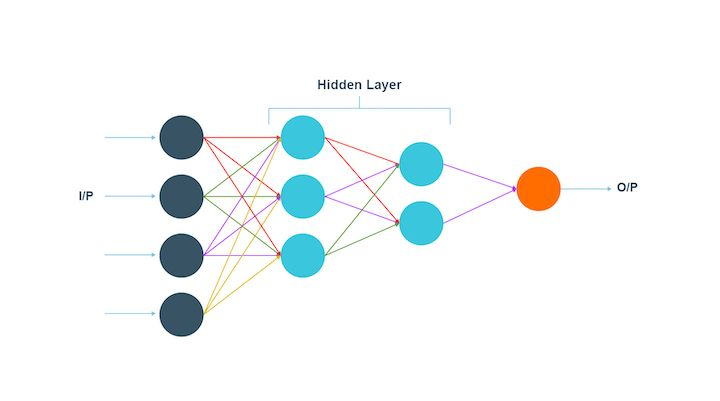

Step 1 Importing Libraries 

#**Numpy** 
is a fundamental package for scientific computing, we will be using this library for computations on our dataset. The library is imported using the alias np.

#**Pandas** 
will help us in using the powerful dataframe object, which will be used throughout the code for building the artificial neural network in Python.

#**Ta-lib**
 is a technical analysis library, which will be used to compute the RSI and Williams %R. These will be used as features in order to train our artificial neural network or ANN. We could add more features using this particular library.

In [ ]:
import numpy as np 
import pandas as pd
import yfinance as yf
import talib

Step 2: Fetching data from yahoo finance

In [2]:
# Setting the random seed to a fixed number
import random
# Setting the random seed to a fixed number

import random
random.seed(42)

In [3]:
# Download the price data of Apple from November 2019 to January 2023
# Set the ticker as 'AAPL' and specify the start and end dates

price_AAPL= yf.download('AAPL', start='2017-11-06', end='2023-01-03', auto_adjust = True)

[*********************100%***********************]  1 of 1 completed


In [19]:
#Step 3: Prepare the dataset

In [6]:
# Preparing the dataset
price_AAPL['H-L'] = price_AAPL['High'] - price_AAPL['Low']
price_AAPL['O-C'] = price_AAPL['Close'] - price_AAPL['Open']
price_AAPL['3day MA'] = price_AAPL['Close'].shift(1).rolling(window = 3).mean()
price_AAPL['10day MA'] = price_AAPL['Close'].shift(1).rolling(window = 10).mean()
price_AAPL['30day MA'] = price_AAPL['Close'].shift(1).rolling(window = 30).mean()
price_AAPL['Std_dev']= price_AAPL['Close'].rolling(5).std()
price_AAPL['RSI'] = talib.RSI(price_AAPL['Close'].values, timeperiod = 9)
price_AAPL['Williams %R'] = talib.WILLR(price_AAPL['High'].values, price_AAPL['Low'].values, price_AAPL['Close'].values, 7)

In [10]:
X = price_AAPL.iloc[:, 4:-1]
y = price_AAPL.iloc[:, -1]

Step 4: Defining input features from dataset
We then prepare the various input features which will be used by the artificial neural network learning for making the predictions. We define the following input features:

High minus Low price
Close minus Open price
Three day moving average
Ten day moving average
30 day moving average
Standard deviation for a period of 5 days
Relative Strength Index
Williams %R

In [7]:
price_AAPL['Price_Rise'] = np.where(price_AAPL['Close'].shift(-1) > price_AAPL['Close'], 1, 0)


In [8]:
price_AAPL = price_AAPL.dropna()


In this part of the code, we will split our input and output variables to create the test and train datasets. This is done by creating a variable called split, which is defined to be the integer value of 0.8 times the length of the dataset.

We then slice the X and y variables into four separate data frames: Xtrain, Xtest, ytrain and ytest. This is an essential part of any machine learning algorithm, the training data is used by the model to arrive at the weights of the model.



In [11]:
# Splitting the dataset
split = int(len(price_AAPL)*0.8)
X_train, X_test, y_train, y_test = X[:split], X[split:], y[:split], y[split:]

The test dataset is used to see how the model will perform on new data which would be fed into the model. The test dataset also has the actual value for the output, which helps us in understanding how efficient the model is.

We will look at the confusion matrix later in the code, which essentially is a measure of how accurate the predictions made by the model are.

Step 5: Standardise the dataset (Data preprocessing)
Another important step in data preprocessing is to standardise the dataset. This process makes the mean of all the input features equal to zero and also converts their variance to 1. This ensures that there is no bias while training the model due to the different scales of all input features.

If this is not done the neural network might get confused and give a higher weight to those features which have a higher average value than others.

We implement this step by importing the StandardScaler method from sklearn.preprocessing library. We instantiate the variable sc with the StandardScaler() function.

In [12]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

Step 6: Building the artificial neural network model
After this we use the fittransform function to implement these changes on the Xtrain and Xtest datasets. The ytrain and y_test sets contain binary values, hence they need not be standardised. Now that the datasets are ready, we may proceed with building the Artificial Neural Network using the Keras library.

Now we will import the functions which will be used to build the artificial neural network. We import the Sequential method from the keras.models library. This will be used to sequentially build the layers of the neural networks learning. The next method that we import will be the Dense function from the keras.layers library.

This method will be used to build the layers of our artificial neural network.

In [13]:
# Building the Artificial Neural Network
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout


In [14]:
classifier = Sequential()

To add layers to our Classifier, we make use of the add() function. The argument of the add function is the Dense() function, which in turn has the following arguments:

Units: This defines the number of nodes or neurons in that particular layer. We have set this value to 128, meaning there will be 128 neurons in our hidden layer.
Kernel_initializer: This defines the starting values for the weights of the different neurons in the hidden layer. We have defined this to be ‘uniform’, which means that the weights will be initialised with values from a uniform distribution.
Activation: This is the activation function for the neurons in the particular hidden layer. Here we define the function as the rectified Linear Unit function or ‘relu’.
Input_dim: This defines the number of inputs to the hidden layer, we have defined this value to be equal to the number of columns of our input feature dataframe. This argument will not be required in the subsequent layers, as the model will know how many outputs the previous layer produced.


In [15]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform'
, activation = 'relu', input_dim = X.shape[1]))




We then add a second layer, with 128 neurons, with a uniform kernel initializer and ‘relu’ as its activation function. We are only building two hidden layers in this neural network.

In [16]:
classifier.add(Dense(units = 128, kernel_initializer = 'uniform'
, activation = 'relu'))

The next layer that we build will be the output layer, from which we require a single output. Therefore, the units passed are 1, and the activation function is chosen to be the Sigmoid function because we would want the prediction to be a probability of the market moving upwards.



In [17]:
classifier.add(Dense(units = 1, kernel_initializer = 'uniform', activation = 'sigmoid'))

Finally, we compile the classifier by passing the following arguments:

Optimizer: The optimizer is chosen to be ‘adam’, which is an extension of the stochastic gradient descent.
Loss: This defines the loss to be optimised during the training period. We define this loss to be the mean squared error.
Metrics: This defines the list of metrics to be evaluated by the model during the testing and training phase. We have chosen accuracy as our evaluation metric.

In [18]:
classifier.compile(optimizer = 'adam', loss = 'mean_squared_error', metrics = ['accuracy'])

Now we need to fit the neural network that we have created to our train datasets. This is done by passing Xtrain, ytrain, batch size and the number of epochs in the fit() function.

The batch size refers to the number of data points that the model uses to compute the error before backpropagating the errors and making modifications to the weights. The number of epochs represents the number of times the training of the model will be performed on the train dataset.



In [19]:
classifier.fit(X_train, y_train, batch_size = 10, epochs = 100)

Epoch 1/100
102/102 [==============================] - 1s 2ms/step - loss: 0.2496 - accuracy: 0.5301
Epoch 2/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2488 - accuracy: 0.5429
Epoch 3/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2478 - accuracy: 0.5439
Epoch 4/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2480 - accuracy: 0.5449
Epoch 5/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2471 - accuracy: 0.5508
Epoch 6/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2473 - accuracy: 0.5469
Epoch 7/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2467 - accuracy: 0.5489
Epoch 8/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2463 - accuracy: 0.5410
Epoch 9/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2456 - accuracy: 0.5666
Epoch 10/100
102/102 [==============================] - 0s 2ms/step - loss: 0.2458 - accura

Step 7: Setting the prediction parameters
With this, our artificial neural network in Python has been compiled and is ready to make predictions.

Now that the neural network has been compiled, we can use the predict() method for making the prediction. We pass X_test as its argument and store the result in a variable named ypred. We then convert ypred to store binary values by storing the condition ypred >0.5. Now, the variable y_pred stores either True or False depending on whether the predicted value was greater or less than 0.5.

In [20]:
# Predicting the movement of the stock
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

8/8 [==============================] - 0s 2ms/step


Next, we create a new column in the dataframe dataset with the column header ‘y_pred’ and store NaN values in the column. We then store the values of y_pred in this new column, starting from the rows of the test dataset.

This is done by slicing the dataframe using the iloc method as shown in the code above. We then drop all the NaN values from the dataset and store them in a new dataframe named trade_price_AAPL.

In [21]:
price_AAPL['y_pred'] = np.NaN
price_AAPL.iloc[(len(price_AAPL) - len(y_pred)):,-1:] = y_pred
trade_price_AAPL = price_AAPL.dropna()

<ipython-input-21-2c1b9326819b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  price_AAPL['y_pred'] = np.NaN


Step 8: Computation of strategy returns and determine trade positions
Now that we have the predicted values of the stock movement. We can compute the returns of the strategy. We will be taking a long position when the predicted value of y is true and will take a short position when the predicted signal is False.

We first compute the returns that the strategy will earn if a long position is taken at the end of today and squared off at the end of the next day. We start by creating a new column named ‘Tomorrows Returns’ in the trade_price_AAPL and store in it a value of 0.

We use decimal notation to indicate that floating point values will be stored in this new column. Next, we store in it the log returns of today, i.e. logarithm of the closing price of today divided by the closing price of yesterday. Next, we shift these values upwards by one element so that tomorrow’s returns are stored against the prices of today.

In [22]:
# Computing Strategy Returns
trade_price_AAPL['Tomorrows Returns'] = 0.
trade_price_AAPL['Tomorrows Returns'] = np.log(trade_price_AAPL['Close']/trade_price_AAPL['Close'].shift(1))
trade_price_AAPL['Tomorrows Returns'] = trade_price_AAPL['Tomorrows Returns'].shift(-1)

<ipython-input-22-d6973ab70475>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Tomorrows Returns'] = 0.
<ipython-input-22-d6973ab70475>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Tomorrows Returns'] = np.log(trade_price_AAPL['Close']/trade_price_AAPL['Close'].shift(1))
<ipython-input-22-d6973ab70475>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveat

Next, we will compute the strategy returns. We create a new column under the header ‘StrategyReturns’ and initialise it with a value of 0 to indicate storing floating point values.

By using the np.where() function, we then store the value in the column ‘Tomorrows Returns’ if the value in the ‘ypred’ column stores True (a long position), else we would store the negative of the value in the column ‘Tomorrows Returns’ (a short position); into the ‘Strategy Returns’ column.

In [23]:
trade_price_AAPL['Strategy Returns'] = 0.
trade_price_AAPL['Strategy Returns'] = np.where(trade_price_AAPL['y_pred'] == True, 
trade_price_AAPL['Tomorrows Returns'], - trade_price_AAPL['Tomorrows Returns'])

<ipython-input-23-9c7bd72db816>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Strategy Returns'] = 0.
<ipython-input-23-9c7bd72db816>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Strategy Returns'] = np.where(trade_price_AAPL['y_pred'] == True,


We now compute the cumulative returns for both the market and the strategy. These values are computed using the cumsum() function. We will use the cumulative sum to plot the graph of market and strategy returns in the last step.

In [24]:
trade_price_AAPL['Cumulative Market Returns'] = np.cumsum(trade_price_AAPL['Tomorrows Returns'])
trade_price_AAPL['Cumulative Strategy Returns'] = np.cumsum(trade_price_AAPL['Strategy Returns'])


<ipython-input-24-fa2060edc174>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Cumulative Market Returns'] = np.cumsum(trade_price_AAPL['Tomorrows Returns'])
<ipython-input-24-fa2060edc174>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  trade_price_AAPL['Cumulative Strategy Returns'] = np.cumsum(trade_price_AAPL['Strategy Returns'])


We will now plot the market returns and our strategy returns to visualise how our strategy is performing against the market. For this, we will import matplotlib.pyplot.

We then use the plot function to plot the graphs of Market Returns and Strategy Returns using the cumulative values stored in the dataframe trade_dataset. We then create the legend and show the plot using the legend() and show() functions respectively.

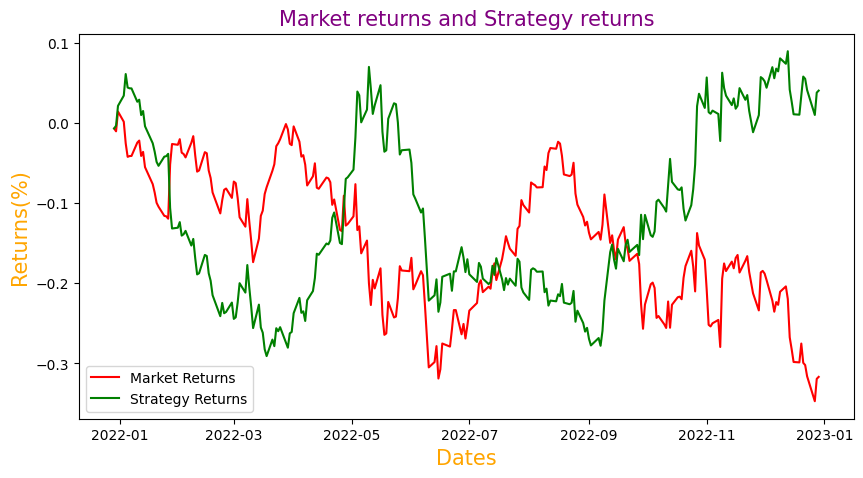

In [25]:
# Plotting the graph of returns
import matplotlib.pyplot as plt
plt.figure(figsize=(10,5))
plt.plot(trade_price_AAPL['Cumulative Market Returns'], color='r', label='Market Returns')
plt.plot(trade_price_AAPL['Cumulative Strategy Returns'], color='g', label='Strategy Returns')

plt.title('Market returns and Strategy returns', color='purple', size=15)

# Setting axes labels for close prices plot
plt.xlabel('Dates', {'color': 'orange', 'fontsize':15})
plt.ylabel('Returns(%)', {'color': 'orange', 'fontsize':15})

plt.legend()
plt.show()